In [1]:
%pylab inline
from ipywidgets import interact
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Стохастические процессы

## Случайные числа

In [2]:
rand()

0.7889014924208672

## ГСЧ

In [69]:
seed(1)
rand(), rand(), rand(), rand()

(0.36965284241372265,
 0.8347295115297049,
 0.4506043466260953,
 0.177089259846544)

Чтобы случайный алгоритм показывал всякий раз одну и ту же картинку, например, для демонстрации, используют команду инициализации seed 

## Генерация выборки

In [81]:
rand(5,3)

array([[0.60542378, 0.40281051, 0.64921891],
       [0.52168139, 0.44923976, 0.80134378],
       [0.30642887, 0.74171681, 0.9763064 ],
       [0.2602385 , 0.33611348, 0.36459792],
       [0.05903783, 0.11041004, 0.47088902]])

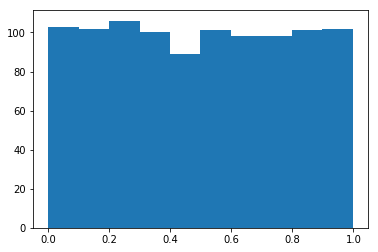

In [99]:
x = rand(1000)
hist(x);

значения равномерно распределены в диапазоне

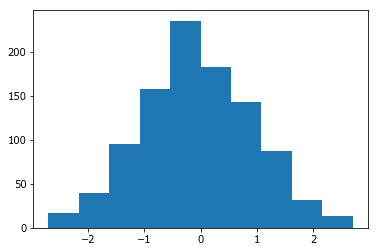

In [4]:
x = randn(1000)
hist(x);

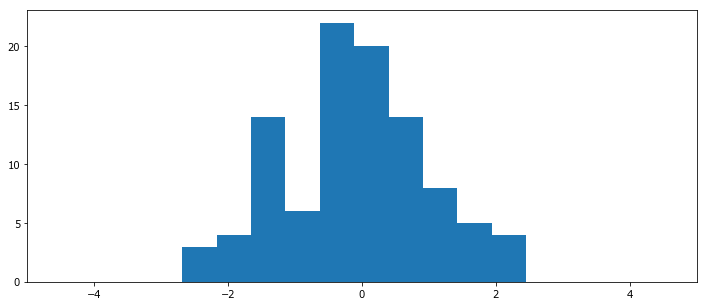

In [17]:
@interact(order=(1,5), mu=(-3,5), sigma=(0.1, 10))
def _pic(order=2, mu=0, sigma=1.):
    figure(figsize=(12,5))
    xlim(-5,5)
    n = 10**order
    x = sigma*randn(n) + mu
    hist(x);

### Нормальное распределение

Есть несколько тестов для проверки нормальности.

Можно построить гистограмму и оценить распределение визуально. Даже если написать, что мы использовали параметрическую статистику несмотря на некоторое нарушение нормальности, никто не будет придираться.

Наиболее уважаемый из научно-обоснованных тестов для проверки нормальности - тест Холмогорова-Смирнова для сравнения эмпирического распределения с заданным теоретическим. В качестве теоретического задается нормальное с известными средним и дисперсией.

Если средне и дисперсия неизвестны, то их можно оценить по эмпирическим данным. Такой подход встречается с названием тест Лиллифорса. 

Lilliefors, H. W. (1967). On the Kolmogorov-Smirnov Test for Normality
    with Mean and Variance Unknown. Journal of the American Statistical Association, 62(318), 399–402.

## Идея повторных измерений

базируется на предположении, что в основе стационарный процесс.

$$ y = \mu + \epsilon $$

$$ \epsilon = N(0, \sigma^2) $$

чем больше измерений, тем точнее оценка.


Повторы нужны для надежной оценки исследуемого феномена.
Оценку можно давать уже после однократного наблюдения, но она будет ненадежной.

**Надежность** - это характеристика информационного канала о его способности передать сообщение без ошибок.

Виды повторов:
- "неисчерпаемые"
- исчерпаемые
- исчерпаемые с повторами

***Стационарные процессы*** - изменения случайные (стохастические) в пределах какого-то распределения.

Распределение определяет примерный контур, в пределах которого будут варьировать значения.

Примеры:
- Гауссовские процессы.
- Пуассоновские процессы.


### Распределения

Способ распределения значений в пределах диапазона измерений.

Распределение Гаусса, нормальное

Гауссиана - кривая

Распределений разных много. Большинство - производные от нормального. Они нужны для специального описания тех случаев, где нормальное становится неточным.

Пример. У лукоморья дуб зеленый.

Желуди падают - больше всего вокруг ствола, поменьше под краем кроны, некоторые разбрасывает ветром вокруг. Примерно гауссово двухмерное. Сойка схватила, отнесла подальше и уронила - выброс. Артефакт - вмешалась внешняя неконтролируемая сила.

Чтобы желудь пророс надо, чтобы его не съели.
Если придет кабанчик, то будет есть там, где концентрация максимальна - у ствола.
А вот маленькая полевка, живущая в пределах кроны, будет собирать ближайшие к норке желуди. Длина пробежки за одним желудем будет постепенно расти по мере того, как желуди поблизости уже собраны.

Пример. Распределение Райса. Расстояние до источника на местности, из которого распространяется сигнал по нормальному закону во все стороны.

![](Rice_distribution_motivation.svg.png)

![](Rice_distributiona_PDF.png)

Райсианна - кривая.

***Нестационарные процессы*** описываются распределениям:
- экспоненциальное
- Уальда

## Capture-Recapture Models

Процедура: поймали - пометили - отпустили

Alunni Fegatelli, D. and Tardella, L. (2012) Improved inference on capture recapture models with behavioural effects. Statistical Methods & Applications Applications Volume 22, Issue 1, pp 45-66 10.1007/s10260-012-0221-4 https://link.springer.com/article/10.1007/s10260-012-0221-4


https://link.springer.com/article/10.1198/108571101750524670


Spatial Capture–Recapture Models
https://www.stat.auckland.ac.nz/~fewster/Borchers_Fewster_SCR_StatSci.pdf


## Экспериментальная генерация данных

Фиксируются условия (кондиции) по возможности. Далее включается генератор данных. Данных собирается столько, сколько возможно, пока "генератор не сломается".

Пример. Посадили человека за компьютер. Задание в ответ на появление стимула - нажимать на кнопку. Условие прекращения - человеку надоест. Если не надоест, то он устанет (изменится функциональное состояние) и нажатия будут уже не те.

Каждое следующее измерение отличается от предыдущего - может быть немного больше или немного меньше.

Изменение (вариация) - расхождение значения с предыдущими.